PROYECTO INTEGRADOR DE APRENDIZAJE


Angie Sofia Hernández Tristán	          2008178

Juan Carlos Serrano Acosta	            2001047

Jorge Fabián Moreno Sarmiento 	        2015221

Mauricio Armando Villatoro Alvarado     2128154

Jesús Sauceda Rivera 	                  2014186



Hora clase: N1, LMV



In [1]:
#1. Instalar librerias
!pip install kaggle
!pip install tensorflow

In [2]:
#2. Configurar Kaggle y descargar el dataset
import os
os.environ['KAGGLE_CONF_DIR'] = "/content/"

In [3]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 98% 379M/385M [00:03<00:00, 129MB/s]
100% 385M/385M [00:03<00:00, 120MB/s]


In [4]:
!unzip /content/cards-image-datasetclassification.zip -d /content/

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: /content/train/jack of spades/059.jpg  
  inflating: /content/train/jack of spades/060.jpg  
  inflating: /content/train/jack of spades/061.jpg  
  inflating: /content/train/jack of spades/062.jpg  
  inflating: /content/train/jack of spades/063.jpg  
  inflating: /content/train/jack of spades/064.jpg  
  inflating: /content/train/jack of spades/065.jpg  
  inflating: /content/train/jack of spades/066.jpg  
  inflating: /content/train/jack of spades/067.jpg  
  inflating: /content/train/jack of spades/068.jpg  
  inflating: /content/train/jack of spades/069.jpg  
  inflating: /content/train/jack of spades/070.jpg  
  inflating: /content/train/jack of spades/071.jpg  
  inflating: /content/train/jack of spades/072.jpg  
  inflating: /content/train/jack of spades/073.jpg  
  inflating: /content/train/jack of spades/074.jpg  
  inflating: /content/train/jack of spades/075.jpg  
  inflating: /content/train/jack

In [5]:
#Verificar la estructura del directorio y ajustar su nombre
print("Contenido de /content/:")
print(os.listdir('/content/'))

Contenido de /content/:
['.config', 'test', 'valid', 'cards.csv', '53cards-53-(200 X 200)-100.00.h5', 'train', 'cards-image-datasetclassification.zip', '14card types-14-(200 X 200)-94.61.h5', 'sample_data']


In [6]:
import os
print("Contenido de /content/:")
print(os.listdir('/content/'))
train_dir = '/content/train'
valid_dir = '/content/valid'


Contenido de /content/:
['.config', 'test', 'valid', 'cards.csv', '53cards-53-(200 X 200)-100.00.h5', 'train', 'cards-image-datasetclassification.zip', '14card types-14-(200 X 200)-94.61.h5', 'sample_data']


In [8]:
#3. Preprocesamiento de las imagenes
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
batch_size = 32
img_height = 150
img_width = 150

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% de los datos se utilizarán para la validación
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Usar este generador para el conjunto de entrenamiento
)

validation_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Usar este generador para el conjunto de validación
)

Found 6121 images belonging to 53 classes.
Found 53 images belonging to 53 classes.


In [10]:
#4. Definir y entrenar la CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
192/192 [==============================] - 336s 2s/step - loss: 2.8296 - accuracy: 0.2678 - val_loss: 1.1165 - val_accuracy: 0.7358
Epoch 2/10
192/192 [==============================] - 355s 2s/step - loss: 1.6407 - accuracy: 0.5532 - val_loss: 0.6568 - val_accuracy: 0.7736
Epoch 3/10
192/192 [==============================] - 337s 2s/step - loss: 0.8747 - accuracy: 0.7528 - val_loss: 0.4952 - val_accuracy: 0.8113
Epoch 4/10
192/192 [==============================] - 322s 2s/step - loss: 0.3625 - accuracy: 0.9079 - val_loss: 0.6228 - val_accuracy: 0.7736
Epoch 5/10
192/192 [==============================] - 331s 2s/step - loss: 0.1801 - accuracy: 0.9608 - val_loss: 0.5806 - val_accuracy: 0.8679
Epoch 6/10
192/192 [==============================] - 321s 2s/step - loss: 0.0905 - accuracy: 0.9815 - val_loss: 0.4800 - val_accuracy: 0.8679
Epoch 7/10
192/192 [==============================] - 346s 2s/step - loss: 0.0803 - accuracy: 0.9827 - val_loss: 0.7041 - val_accuracy: 0.8679

In [13]:
#5. 5 predicciondes y gráfica
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_and_show(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    plt.imshow(img)
    plt.title(f'Prediction: {list(train_generator.class_indices.keys())[predicted_class[0]]}')
    plt.show()


1/1 [==============================] - 0s 188ms/step


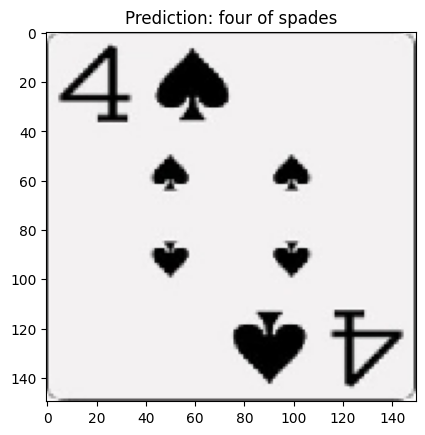

1/1 [==============================] - 0s 41ms/step


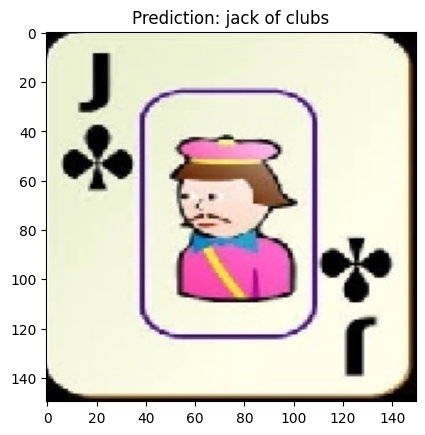

1/1 [==============================] - 0s 47ms/step


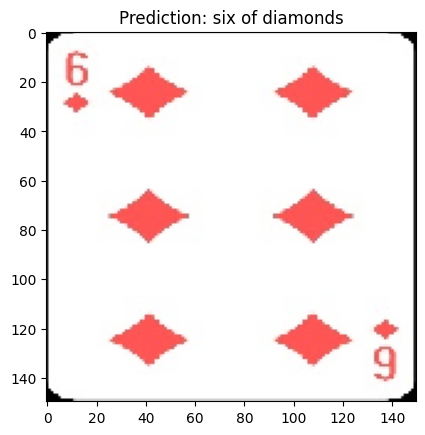

1/1 [==============================] - 0s 43ms/step


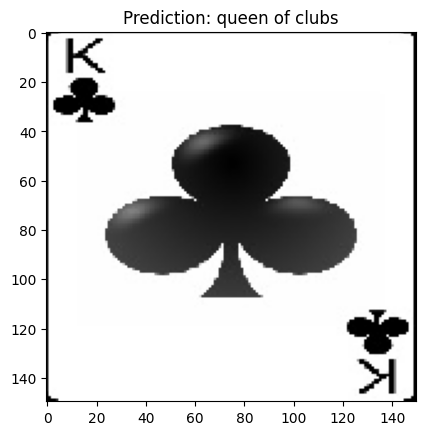

1/1 [==============================] - 0s 40ms/step


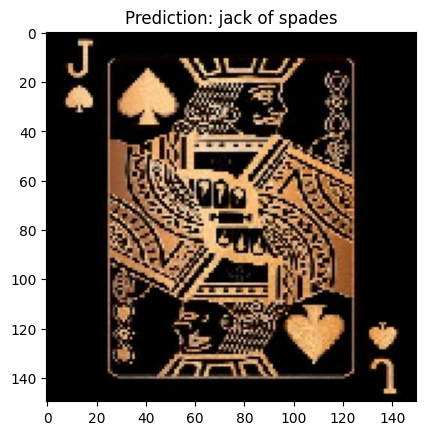

In [14]:
import random

test_image_paths = []
for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)
    if os.path.isdir(class_path):
        test_image_paths.extend([os.path.join(class_path, img) for img in os.listdir(class_path)[:5]])

for img_path in random.sample(test_image_paths, 5):
    predict_and_show(img_path)

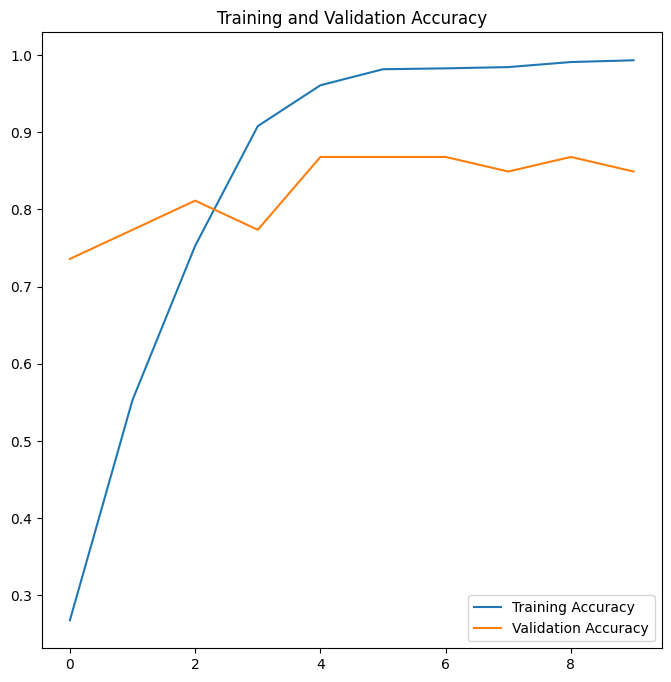

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()